# Sentiment Analysis for Customer Reviews Challenge

## Challenge:
Develop a robust Sentiment Analysis classifier for XYZ customer reviews, automating the categorization into positive, negative, or neutral sentiments. Utilize Natural Language Processing (NLP) techniques, exploring different sentiment analysis methods.

## Problem Statement:
XYZ organization, a global online retail giant, accumulates a vast number of customer reviews daily. Extracting sentiments from these reviews offers insights into customer satisfaction, product quality, and market trends. The challenge is to create an effective sentiment analysis model that accurately classifies XYZ customer reviews.

### Important Instructions:

1. Make sure this ipynb file that you have cloned is in the __Project__ folder on the Desktop. The Dataset is also available in the same folder.
2. Ensure that all the cells in the notebook can be executed without any errors.
3. Once the Challenge has been completed, save the SentimentAnalysis.ipynb notebook in the __*Project*__ Folder on the desktop. If the file is not present in that folder, autoevalution will fail.
4. Print the evaluation metrics of the model. 
5. Before you submit the challenge for evaluation, please make sure you have assigned the Accuracy score of the model that was created for evaluation.
6. Assign the Accuracy score obtained for the model created in this challenge to the specified variable in the predefined function *submit_accuracy_score*. The solution is to be written between the comments `# code starts here` and `# code ends here`
7. Please do not make any changes to the variable names and the function name *submit_accuracy_score* as this will be used for automated evaluation of the challenge. Any modification in these names will result in unexpected behaviour.

### --------------------------------------- CHALLENGE CODE STARTS HERE --------------------------------------------

In [61]:
## import all the necessary libraries
import warnings
warnings.filterwarnings("ignore")                   
import numpy as np                                
import pandas as pd                              
import nltk    

In [62]:
##reading dataset
data = pd.read_csv("Reviews.csv")
print(data.shape)
data.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [63]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')



```

### Data Preprocessing

In [64]:
### add some columns for upvote metrics
data['Helpful %'] = np.where(data['HelpfulnessDenominator'] > 0, data['HelpfulnessNumerator'] / data['HelpfulnessDenominator'], -1)

In [65]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [66]:
# data['Helpful %'].unique()

In [67]:
data['%upvote'] = pd.cut( data['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty','0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

In [68]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,-1.0,NaN
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,-1.0,NaN
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0,80-100%
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,1.0,80-100%


In [69]:
data.groupby(['Score', '%upvote']).agg({'Id':'count'})

Id
Score %upvote        
1     Empty      8060
      0-20%      2338
      20-40%     4649
      40-60%     6586
      60-80%     5838
      80-100%   12531
2     Empty      4234
      0-20%       762
      20-40%     1618
      40-60%     3051
      60-80%     2486
      80-100%    7014
3     Empty      5062
      0-20%       474
      20-40%     1506
      40-60%     3384
      60-80%     2754
      80-100%   11037
4     Empty      4780
      0-20%       116
      20-40%      909
      40-60%     3185
      60-80%     2941
      80-100%   26707
5     Empty     11638
      0-20%       432
      20-40%     2275
      40-60%    10312
      60-80%    11060
      80-100%  140661

In [70]:
data_group=data.groupby(['Score', '%upvote']).agg({'Id':'count'}).reset_index()

In [71]:
pivot=data_group.pivot(index='%upvote',columns='Score')
# pivot

In [72]:
data2=data[data['Score']!=3]
data2.groupby(['Score', '%upvote']).agg({'Id':'count'})

Id
Score %upvote        
1     Empty      8060
      0-20%      2338
      20-40%     4649
      40-60%     6586
      60-80%     5838
      80-100%   12531
2     Empty      4234
      0-20%       762
      20-40%     1618
      40-60%     3051
      60-80%     2486
      80-100%    7014
4     Empty      4780
      0-20%       116
      20-40%      909
      40-60%     3185
      60-80%     2941
      80-100%   26707
5     Empty     11638
      0-20%       432
      20-40%     2275
      40-60%    10312
      60-80%    11060
      80-100%  140661

### Getting X and Y for model training

In [73]:
#turning into classification problem(0,1)
dict={1:0,2:0,4:1,5:1}
y=data2['Score'].map(dict)
y  

0         1
1         0
2         1
3         0
4         1
         ..
568449    1
568450    0
568451    1
568452    1
568453    1
Name: Score, Length: 525814, dtype: int64

In [74]:
X=data2['Text']  

### CountVectorizer

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(stop_words = 'english')

In [76]:
traindata= cv.fit_transform(X)

In [77]:
traindata.shape[1]

114969

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(traindata, y, test_size=0.33, random_state=42)

In [79]:
X_train.shape[1]

114969

In [80]:
print("X_train {}".format(X_train.shape[0]),"y_train {}".format(y_train.shape[0]))
print("X_test {}".format(X_test.shape[0]),"y_test {}".format(y_test.shape[0]))

X_train 352295 y_train 352295
X_test 173519 y_test 173519


### Logistic Regression (CountVectorizer)

In [81]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [82]:
model_lr =log.fit(X_train, y_train)

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=["positive", "negative"]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[ 19588   7515]
 [  3567 142849]]


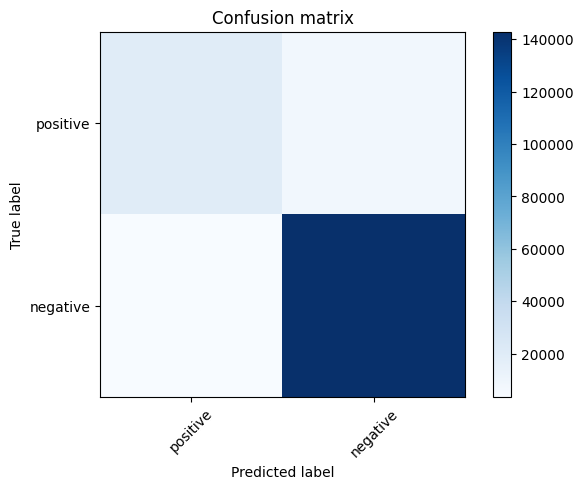

In [85]:
plt.figure()
cm=confusion_matrix(y_test,model_lr.predict(X_test))
print(cm)
plot_confusion_matrix(cm)    
plt.show()

In [86]:
from sklearn.metrics import classification_report
acc1 = model_lr.score(X_test, y_test)
print ('Model Accuracy: {}'.format(acc1))
print("\n")
report=classification_report(y_test,model_lr.predict(X_test))
print(report)

Model Accuracy: 0.9361337951463529


              precision    recall  f1-score   support

           0       0.85      0.72      0.78     27103
           1       0.95      0.98      0.96    146416

    accuracy                           0.94    173519
   macro avg       0.90      0.85      0.87    173519
weighted avg       0.93      0.94      0.93    173519



### Random Forest (CountVectorizer)

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
model_rf=RandomForestClassifier(n_estimators=300,max_depth=3,criterion='entropy')

In [89]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=300)

In [90]:
from sklearn.metrics import confusion_matrix

In [91]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Greys, labels=["positive", "negative"]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[ 19588   7515]
 [  3567 142849]]


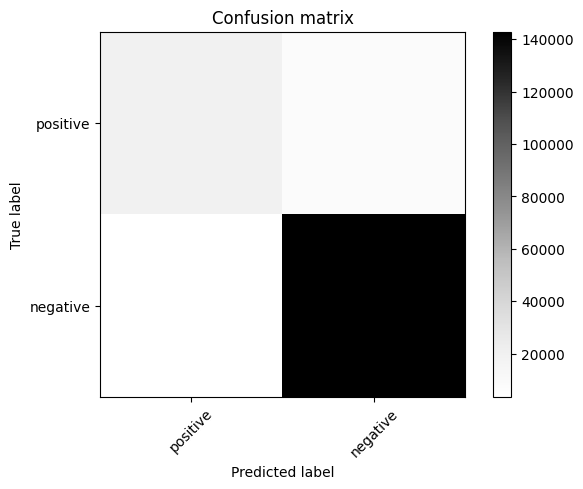

In [92]:
plt.figure()
cm=confusion_matrix(y_test,model_lr.predict(X_test))
print(cm)
plot_confusion_matrix(cm)    
plt.show()

In [93]:
from sklearn.metrics import classification_report
acc2 = model_rf.score(X_test, y_test)
print ('Model Accuracy: {}'.format(acc2))
print("\n")
report=classification_report(y_test,model_rf.predict(X_test))
print(report)

Model Accuracy: 0.8438038485698972


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     27103
           1       0.84      1.00      0.92    146416

    accuracy                           0.84    173519
   macro avg       0.42      0.50      0.46    173519
weighted avg       0.71      0.84      0.77    173519



## Linear Support Vector Machine (CountVectorizer)

In [94]:
from sklearn import svm
from sklearn.svm import SVC, LinearSVC

In [95]:
basicmodel = svm.LinearSVC(C=0.1, class_weight='balanced')
basicmodel = basicmodel.fit(X_train, y_train)

In [96]:
from sklearn.metrics import confusion_matrix

In [97]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.YlOrRd, labels=["positive", "negative"]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[ 23833   3270]
 [ 10547 135869]]


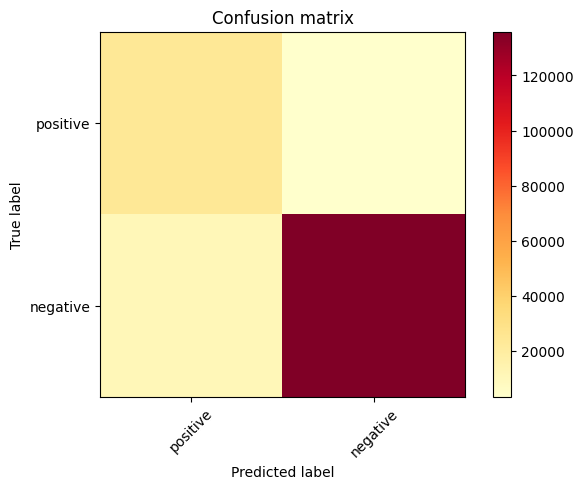

In [98]:
plt.figure()
cm=confusion_matrix(y_test,basicmodel.predict(X_test))
print(cm)
plot_confusion_matrix(cm)    
plt.show()

In [99]:
from sklearn.metrics import classification_report
acc3 = basicmodel.score(X_test, y_test)
print ('Model Accuracy: {}'.format(acc3))
print("\n")
report=classification_report(y_test,basicmodel.predict(X_test))
print(report)

Model Accuracy: 0.9203718324794403


              precision    recall  f1-score   support

           0       0.69      0.88      0.78     27103
           1       0.98      0.93      0.95    146416

    accuracy                           0.92    173519
   macro avg       0.83      0.90      0.86    173519
weighted avg       0.93      0.92      0.92    173519



#### Sentiment Analysis With Logistic Regression


In [100]:
features = cv.get_feature_names_out()

In [101]:
coef = model_lr.coef_.tolist()[0]

In [102]:
word_coeff = pd.DataFrame({'Word' : features, 'Coefficient' : coef})

In [103]:
word_coeff = word_coeff.sort_values(['Coefficient', 'Word'],ascending=False)

In [104]:
print('Positive Sentiments')
print(word_coeff.head(30).to_string(index=False))

Positive Sentiments
         Word  Coefficient
   pleasantly     3.828897
     downside     3.199562
    skeptical     2.852172
    addicting     2.824547
      easiest     2.311358
     drawback     2.273708
       resist     2.245828
       delish     2.244187
     soothing     2.243052
      welcome     2.160956
      worries     2.145323
       brings     2.126226
     thankful     2.100666
   economical     2.091732
     relaxing     2.087028
       hooked     2.064003
         whim     1.981629
    excellent     1.968116
      perfect     1.930909
    delicious     1.925094
       solved     1.923321
          nom     1.904391
deliciousness     1.897150
 conventional     1.887624
 enthusiastic     1.880463
    delighted     1.868856
        guilt     1.860580
        saves     1.853022
       keeper     1.844013
          met     1.836781


In [105]:
print('Negative Sentiments')        
print(word_coeff.tail(30).to_string(index=False))

Negative Sentiments
          Word  Coefficient
       allegro    -2.056566
          lame    -2.132212
      terrible    -2.137087
       expires    -2.160237
        lacked    -2.173685
 dissapointing    -2.175361
       vomited    -2.202466
     redeeming    -2.207014
      canceled    -2.210208
         lousy    -2.235039
        bummer    -2.277624
       defeats    -2.287488
    unbearable    -2.340885
         ruins    -2.365184
    overpowers    -2.391034
        choked    -2.407086
           ick    -2.439327
    unfinished    -2.447283
disappointment    -2.576271
   disapointed    -2.602330
   embarrassed    -2.684059
      mediocre    -2.685454
     cancelled    -2.853793
    returnable    -2.910926
        ripoff    -2.917029
         worst    -2.924555
  unacceptable    -2.984307
 disappointing    -2.987511
     deceptive    -3.539835
   undrinkable    -3.689175


In [106]:
print("{:.2f}".format(acc1*100),"%", "{:.2f}".format(acc2*100),"%","{:.2f}".format(acc3*100), "%")

93.61 % 84.38 % 92.04 %


In [107]:
data_viz = [['Logistic Regression', acc1*100], ['Random Forest', acc2*100],['Linear Support Vector Machine (CountVectorizer)', acc3*100]]
plot = pd.DataFrame(data_viz, columns = ['Model', 'Accuracy'])
plot

,Model,Accuracy
0,Logistic Regression,93.613380
1,Random Forest,84.380385
2,Linear Support Vector Machine (CountVectorizer),92.037183


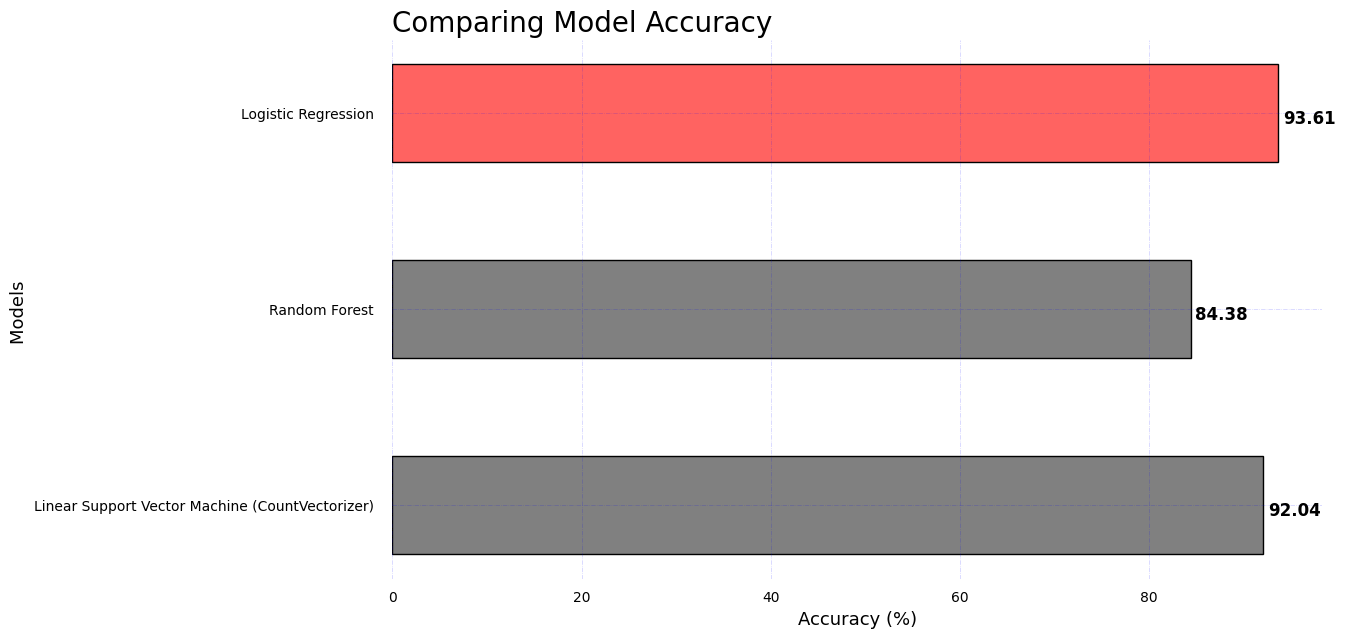

In [108]:
import pandas as pd
from matplotlib import pyplot as plt


# Figure Size
fig, ax = plt.subplots(figsize =(12, 7))

# Horizontal Bar Plot
ax.barh(plot['Model'], plot['Accuracy'],0.5,color=["#ff6361","Grey","Grey","Grey","Grey","Grey"] , edgecolor="Black")

# Removing axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(color ='blue',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.5, i.get_y()+0.3,
			str(round((i.get_width()), 2)),
			fontsize = 12, fontweight ='bold',
			color ='black')

# Add Plot Title
ax.set_title('Comparing Model Accuracy ',
			loc ='left', fontsize=20)

plt.ylabel('Models ', fontsize=13)
plt.xlabel('Accuracy (%)', fontsize=13)

# Show Plot
plt.show()


In [109]:
accuracy = max(acc1,acc2,acc3)
accuracy

0.9361337951463529

### --------------------------------------- CHALLENGE CODE ENDS HERE --------------------------------------------

### NOTE:
1. Assign the Accuracy score obtained for the model created in this challenge to the specified variable in the predefined function *submit_accuracy_score* below. The solution is to be written between the comments `# code starts here` and `# code ends here`
2. Please do not make any changes to the variable names and the function name *submit_accuracy_score* as this will be used for automated evaluation of the challenge. Any modification in these names will result in unexpected behaviour.

In [110]:
def submit_accuracy_score(accuracy)-> float:
    #accuracy should be in the range of 0.0 to 1.0
    accuracy = accuracy
    # code starts here
   
    # code ends here
    return accuracy

In [111]:
submit_accuracy_score(accuracy)

0.9361337951463529